# Part A (Analysis of the Given Dataset)

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

**Write Here**

The dataset are given astwo groups: 1.training set (train.csv) 2.test set (test.csv) The training set is used to build the ML models. For the training set, we are provided with the outcome for each passenger. The model will be based on features like passengers’ gender and class. The test set is used to see how well the model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is our job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic. We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive. survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sibsp # of siblings / spouses aboard the Titanic
parch # of parents / children aboard the Titanic
ticket Ticket number
fare Passenger fare
cabin Cabin number
embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored) parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson. Exploratory data analysis (EDA) is a term for certain kinds of initial analysis and findings done with data sets, usually early on in an analytical process. Some experts describe it as “taking a peek” at the data to understand more about what it represents and how to apply it. Exploratory data analysis is often a precursor to other kinds of work with statistics and data.In EDA, we will be doing preprocessing of the data by analysing the data either categorical or numerical, visualizing them and some statistical decision. we use the EDA , Data Processing and Performance Titanic ML model.

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [201]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
gender_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

In [202]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [203]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [204]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [205]:
#Show all column names
# Code Here
column_names = list(df.columns.values)
print("Columns Names:",column_names)

Columns Names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [206]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB
None
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin  

In [207]:
# Count rows and coulums
# Code Here
print("Rows:",len(df))
print("Columns:",len(df.columns))

Rows: 1309
Columns: 12


In [208]:
# Total cells in the dataset
# Code Here
print("Total cells in the dataset:",df.size)

Total cells in the dataset: 15708


### 2.2 Data Cleaning









#### Identifying duplicate values


In [209]:
# Code Here 
duplicate = df[df.duplicated()]
 
print("Duplicate Rows:", duplicate)


Duplicate Rows: Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


#### Identifying missing values


In [210]:
# Find the amount of missing values in each column
# Code Here 
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [211]:
# Calculating the percentage of missing values:
print("The percentage of missing values:",(df.isnull().sum().sum() / df.size).round(4)*100,"%")

The percentage of missing values: 8.15 %


#### Visualisation of missing data


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked

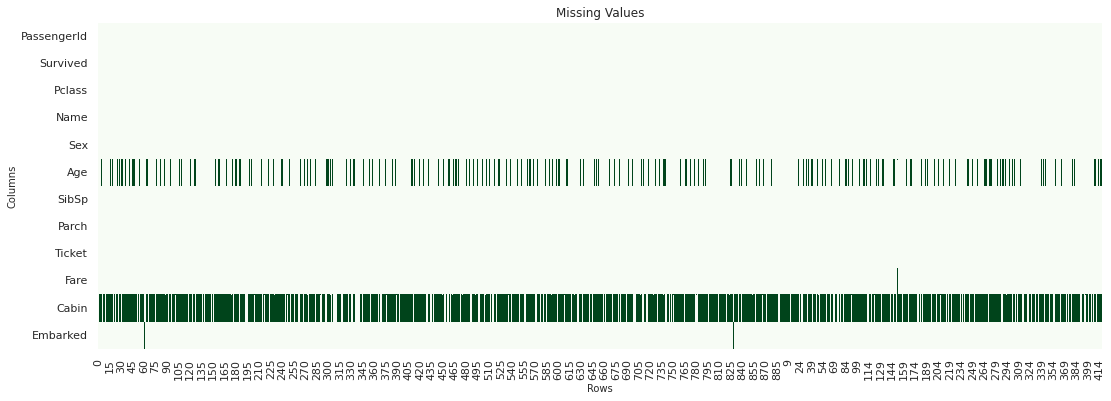

In [212]:
# Detect missing values
print(df.isnull())

# Visualisation
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull().transpose(),
            cbar=False, cmap="Greens")
plt.title("Missing Values", fontsize=12)
plt.xlabel("Rows", fontsize = 10) 
plt.ylabel("Columns", fontsize = 10)
plt.show()


#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




In [213]:
# Code Here (Add as many cells as you need)
df.Cabin.fillna('NULL', inplace = True)
df.dropna(subset=['Embarked'], inplace = True)
df.Age.fillna(df.Age.mode()[0], inplace = True)
df.dropna(subset=['Fare'], inplace = True)
#print(df.to_string())

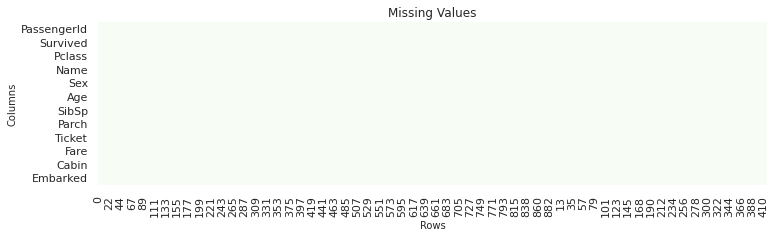

In [214]:
#Analysis using plots
plt.figure(figsize=(12,3))
sns.heatmap(df.isnull().transpose(),
            cbar=False, cmap="Greens")
plt.title("Missing Values", fontsize=12)
plt.xlabel("Rows", fontsize = 10) 
plt.ylabel("Columns", fontsize = 10)
plt.show()

 ##### Discuss your findings

We can see that, there are some missing values in the dataset. So we tried to fix the missing values. For the Cabin column missing values, we filled them using the 'NULL' word. Because there are too much missing values. For the Embarded and Fare column, we drop the rows of the missing values. For Age column, we used mode for the missing values.

### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [215]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NULL,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NULL,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NULL,S,0


#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [216]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number
PassengerId,1.000000,-0.018727,-0.040466,0.023848,-0.055346,0.008931,0.032245,-0.011720
Survived,-0.018727,1.000000,-0.262114,-0.033909,0.003032,0.109718,0.232286,0.687409
Pclass,-0.040466,-0.262114,1.000000,-0.398369,0.060149,0.017596,-0.557861,-0.121407
Age,0.023848,-0.033909,-0.398369,1.000000,-0.185126,-0.112600,0.191041,-0.047540
SibSp,-0.055346,0.003032,0.060149,-0.185126,1.000000,0.373281,0.161030,0.110529
Parch,0.008931,0.109718,0.017596,-0.112600,0.373281,1.000000,0.222327,0.214179
Fare,0.032245,0.232286,-0.557861,0.191041,0.161030,0.222327,1.000000,0.184034
Sex_Number,-0.011720,0.687409,-0.121407,-0.047540,0.110529,0.214179,0.184034,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

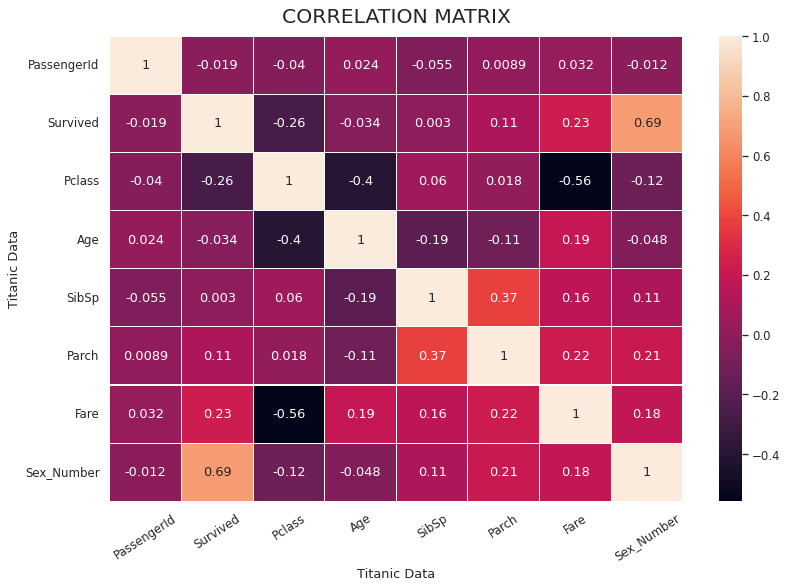

In [217]:
# Visualisation of the corralation table

plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.1)? Write in your own words in this cell.

Write below:



Correlation plots are used to understand if the value of one column is related to the value of the other column. If the value is greater than or equal of 0.3, we will assume that, the variable has a relation with the other variable. In 2.3.1, we can see that the ‘PassengerId’ had no relation with the other columns. The ‘Survived’ had a relation with the ‘Sex_Number’. It means that the survived passengers of titanic are related to the gender. The ‘Pclass’ had no relation with the other columns. The ‘Age’ had no relation with the other columns. The ‘SibSp’ had a relation with the ‘Parch’. It means that the passengers of titanic had relation between significant number of siblings/spouses and parents/children. The ‘Fare’ had no relation with the other columns.


#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



##### 2.3.2.1 Sex Proportion

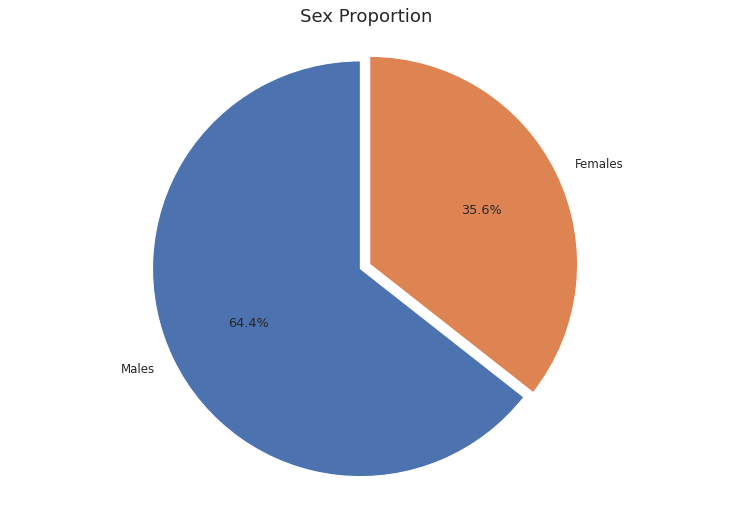

In [107]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below:



From section 2.3.2.1, we can understand that in the titanic, there were 64.4% passengers were male and 35.6% passenger were female. Explode used for dividimg the 2 potion of the pie chart. Strangle is used for positioning the chart in 90 degree and autopact is used for the rounding of the values.


##### 2.3.2.2 Age comparision of the people who survived and those who died

In [21]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data

,Survived
0,814
1,492


In [22]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

,Fare,Parch,Pclass,SibSp
Survived,,,,
0,23.879124,0.312039,2.466830,0.497543
1,48.684715,0.508130,2.014228,0.504065


In [23]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,814,0.33,74.0,28.986376,24.0
1,492,0.17,80.0,28.073699,24.0


In [24]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [25]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

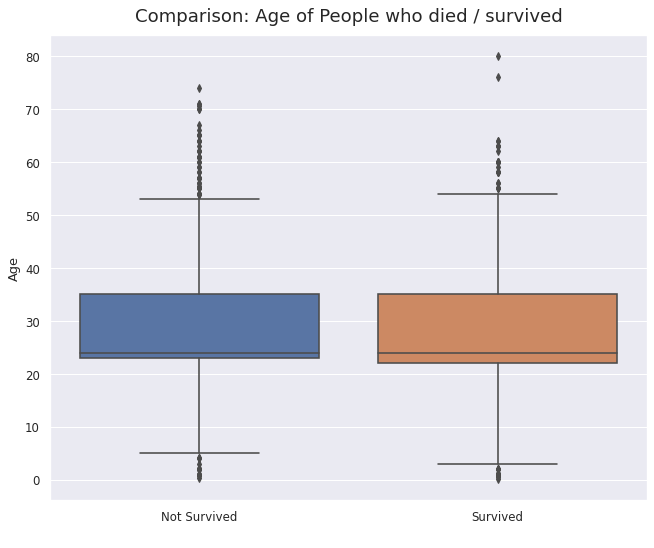

In [26]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.2)? Write in your own words in this cell.

Write below:

 Here we at first had find out the survived number of people in the the titanic where the number of Female is '0' about 815 and Male is '1' about 494. Then we create a pivot where it requires a data and an index parameter data is the Pandas dataframe you pass to the function. Index is the feature that allows the group in our data. The index feature will appear as an index in the resultant table. The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. As in the GroupBy, the aggregation specification can be a string representing one of several common choices as 'sum', 'mean', 'count', 'min', 'max', etc. Additionally, it can be specified as a dictionary mapping a column to any of the above desired options. Last we use the boxplot to find the Not survived and Survived ratio in the quartile range and outliers.

##### 2.3.2.3 The barplot compares the survival 

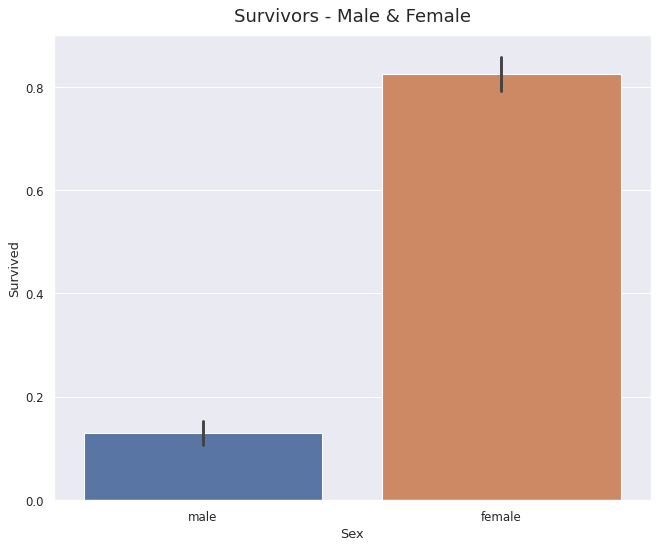

In [27]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.3)? Write in your own words in this cell.

Write below:

Here in a barplot (or barchart) is that shows the relationship between a numeric and a categoric variable. In the graph it shows about the survival ratio of Male and Female ratio on the titanic.

##### 2.3.2.4 Comparison: Survivors - Male & Female

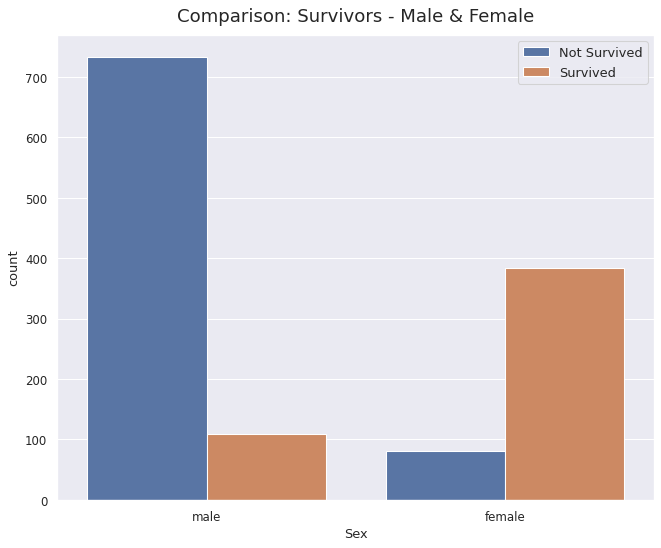

In [28]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.4)? Write in your own words in this cell.

Write below:

Here it is a histogram is used to find the information about survived and Not survived amoung Male and Femalein the graph. A Histogram is a graph that shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears). The survived is shown brown color and Not survived in blue.

In [29]:
# Find percentage of women who survived

female = (df['Sex']== 'female').sum()
s0 = ((df['Sex'] == 'female') & (df['Survived'] == 1)).sum()
print((s0/female)*100,'%')

82.54310344827587 %


In [30]:
# Find percentage of men who survived

male = (df['Sex']== 'male').sum()
s1 = ((df['Sex'] == 'male') & (df['Survived'] == 1)).sum()
print((s1/male)*100,'%')

12.945368171021377 %


##### 2.3.2.5 Compares the chance of survival for each ticket class

In [31]:
df['Pclass'].value_counts()

3    708
1    321
2    277
Name: Pclass, dtype: int64

In [32]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         184
2      0         160
       1         117
3      0         517
       1         191

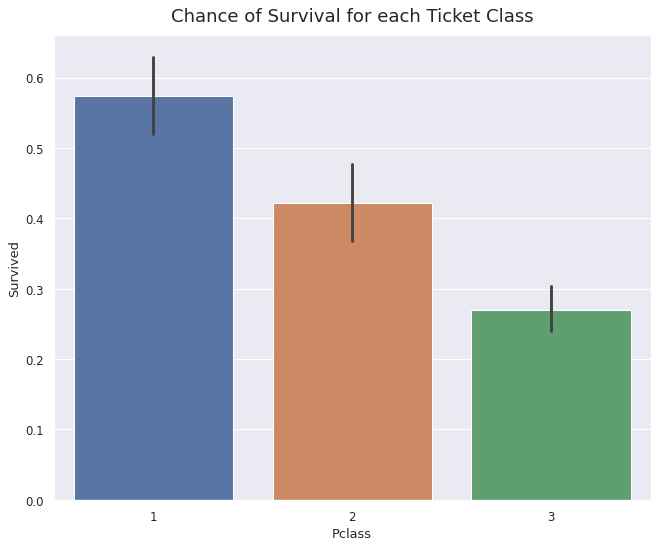

In [33]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

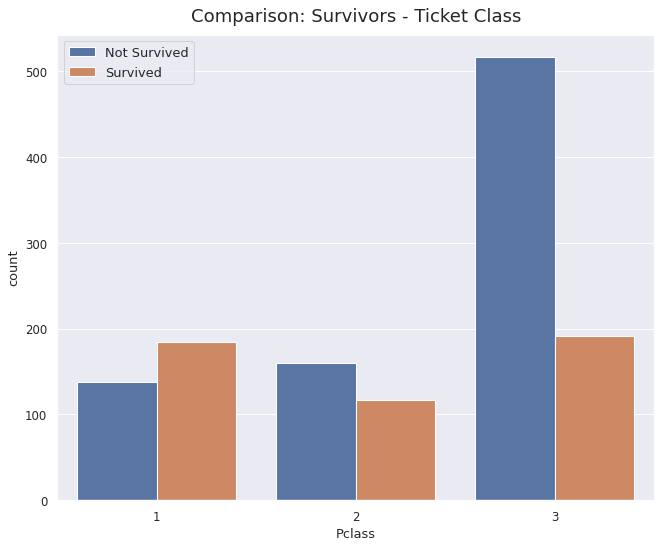

In [34]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below:

Here first the Count() is a Python built-in function that returns the number of times an object appears in a list. It returns the number of ticket class values survived and not survived in a string or a list. A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations as groupby(['Pclass', 'Survived']).Age.agg([len]). In the Boxplot it shows about the the chances of survival of each ticket holder passengers in the titanic. The ratio of survival in each class of the ship. In the last the comparision is performed betweewn the survived and not survived  among the ticket of passengers ion the titanic. 

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [35]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  23.861111
       1        1       139  14.00  76.0  36.064748
                2       100   0.92  60.0  26.884200
                3       144   0.17  63.0  22.153958
male   0        1       134   6.00  71.0  39.533582
                2       154   2.00  70.0  31.769481
                3       445   0.33  74.0  25.604292
       1        1        45   0.92  80.0  34.887111
                2        17   0.67  62.0  16.960588
                3        47   0.42  45.0  22.604681

In [36]:
df['Parch'].value_counts().to_frame()

,Parch
0,999
1,170
2,113
3,8
5,6
4,6
6,2
9,2


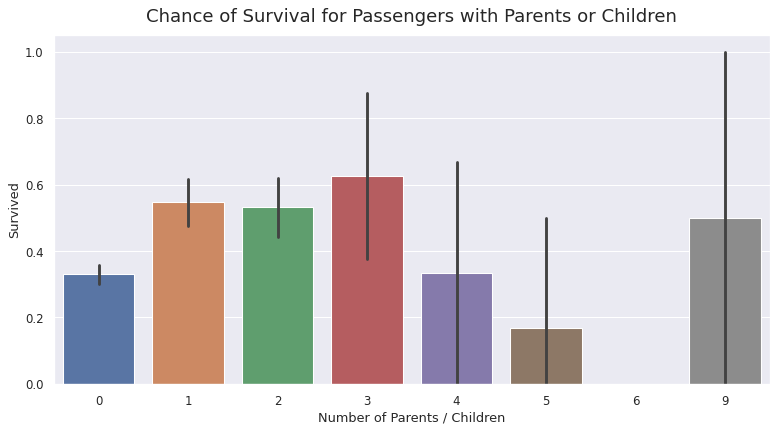

In [37]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

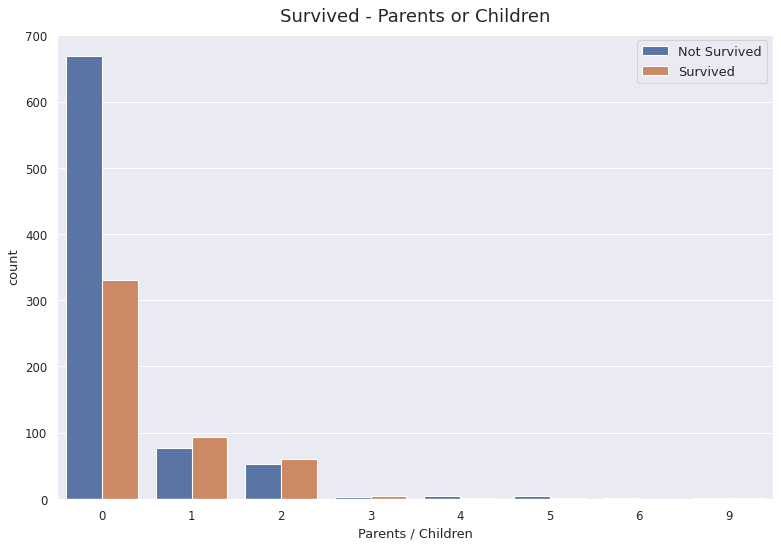

In [38]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [39]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                  
0     0         669  11.00  74.0
      1         330   5.00  80.0
1     0          77   0.75  70.0
      1          93   0.42  64.0
2     0          53   0.33  58.0
      1          60   0.17  64.0
3     0           3  16.00  61.0
      1           5  24.00  54.0
4     0           4  29.00  64.0
      1           2  24.00  60.0
5     0           5  39.00  41.0
      1           1  38.00  38.0
6     0           2  40.00  43.0
9     0           1  24.00  24.0
      1           1  24.00  24.0

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below:

Here A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations as df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean']). The count() is used to count thr Parch value from the dataframe. In the Barplot it is shown in the graph that the number of passenger in the titanic who had children with them. Also it shows how many childrens does a passenger had along with them. In the countplot it was compared along how many passengers along with childxren had survived and not survived in the titanic. Last the groupby is used to the age of parents with children as df.groupby(['Parch','Survived']).Age.agg([len, min, max])

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [40]:
df.SibSp.value_counts()

0    888
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [41]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         592  29.602466
      1         296  28.514358
1     0         153  32.266340
      1         166  28.286205
2     0          23  23.956522
      1          19  23.236842
3     0          15  14.600000
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  22.812500
      1           1  24.000000

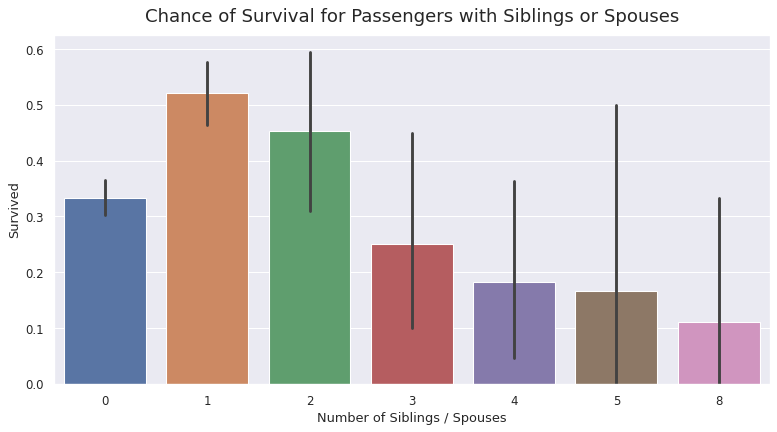

In [42]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

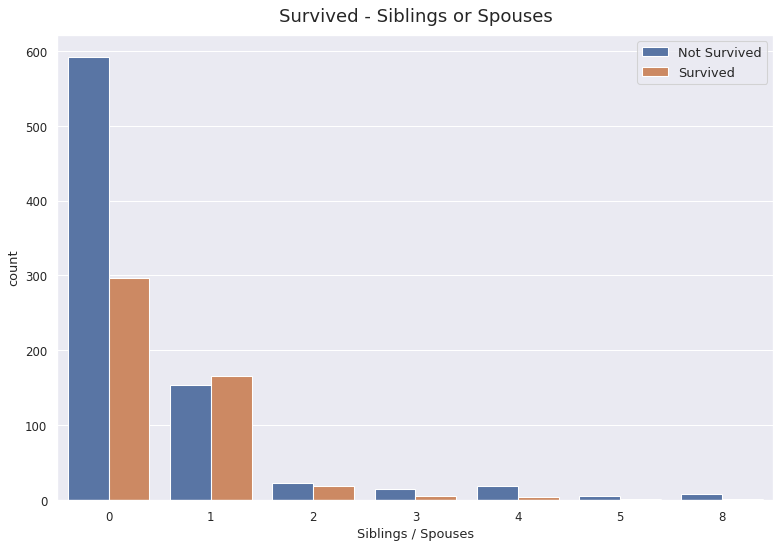

In [43]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [44]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                             
0     0         592   0.33  74.0  29.602466
      1         296   0.42  80.0  28.514358
1     0         153   0.75  70.0  32.266340
      1         166   0.17  76.0  28.286205
2     0          23   9.00  44.0  23.956522
      1          19   0.75  59.0  23.236842
3     0          15   2.00  31.0  14.600000
      1           5  23.00  33.0  27.600000
4     0          18   1.00  16.0   7.222222
      1           4   3.00  38.0  15.750000
5     0           5   1.00  16.0  10.200000
      1           1  10.00  10.0  10.000000
8     0           8  14.50  24.0  22.812500
      1           1  24.00  24.0  24.000000

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below:

Here we use the count() function in the Sibsp column in the dataframe. A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations as df.groupby(['SibSp','Survived']).Age.agg([len, 'mean']). In the Barplot it is shown in the graph that the number of passenger in the titanic who had siblings or spouse with them. Also it shows how many siblings does a passenger had along with them. In the countplot it was compared along how many passengers along with siblings or spouse had survived and not survived in the titanic. Last the groupby is used to the numbers of passengers with siblings or spouse as df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

##### 2.3.2.8 Chance of Survival by Port of Embarkation

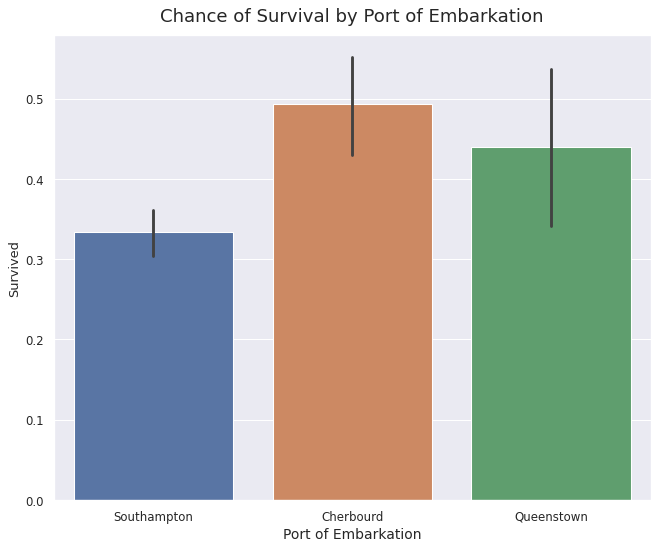

In [45]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

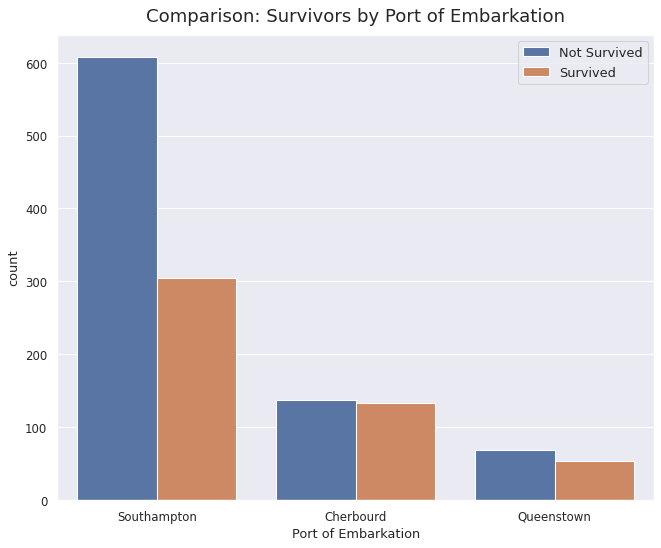

In [46]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below:

Here in the Barplot it is shown in the graph that the chance of embarkation in the titanic who had travel from the three different ports. Also it shows the numbers of passengers had taken the travel in the titanic from three different port. In the countplot it was compared along how many passengers along with the travel of their start of destination had survived and not survived in the titanic. In the blue part is denoted by Not survived and brown part is denoted by Survived.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

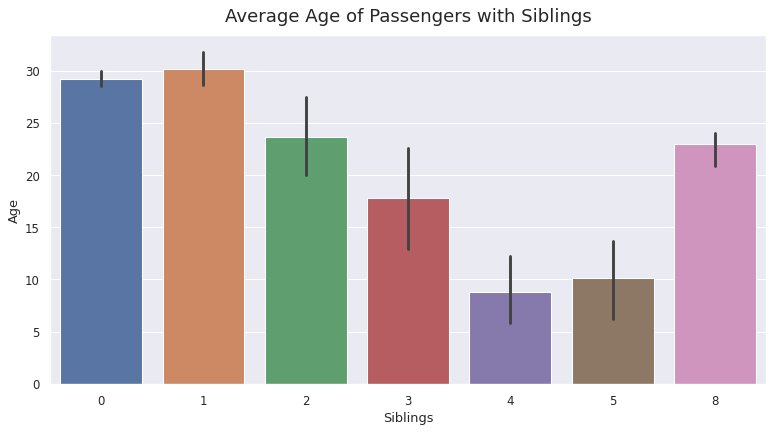

In [47]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

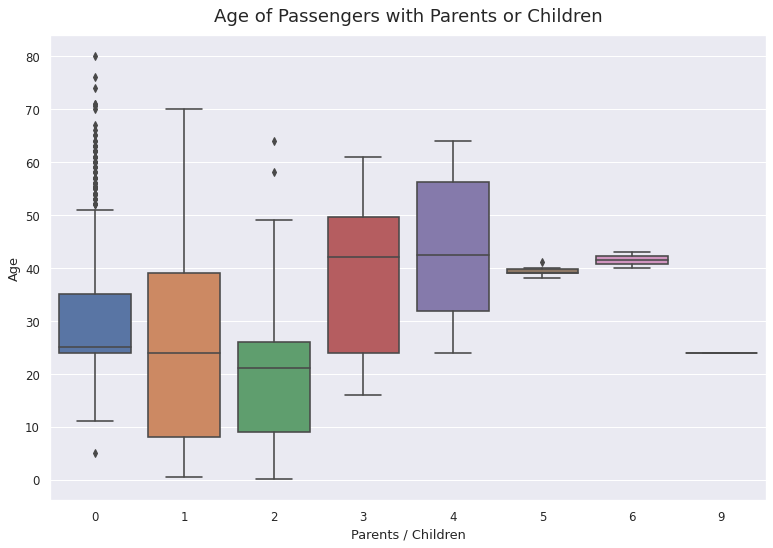

In [48]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

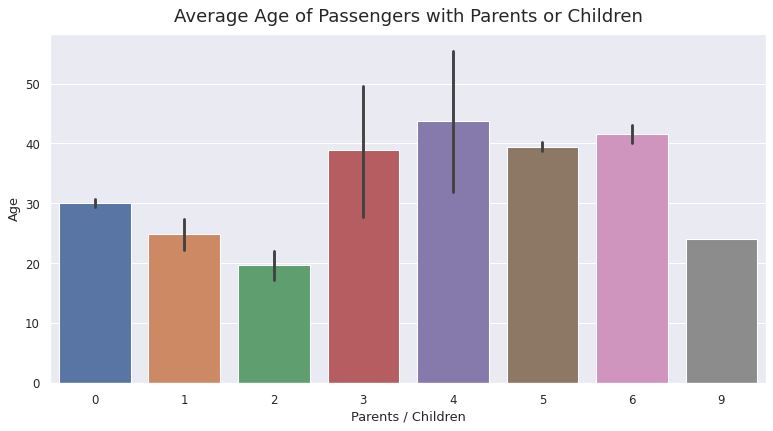

In [49]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below:

 Here in the Barplot it is shown in the graph that the average age of passengers with siblings in the titanic. Also it shows the numbers of siblings had taken the travel in the titanic with the passenger along the quantity of siblings. Again in the Boxplot graph it is shown the average of passengers and children in the y-axis and the number as x-axis with nthe number of siblings. And in the countplot it was compared along how many passengers along with the had age and number of parents and childrenin the titanic. From which we can get the average age of passengers with parents or children.

##### 2.3.2.10 Age of Passengers for each Ticket Class

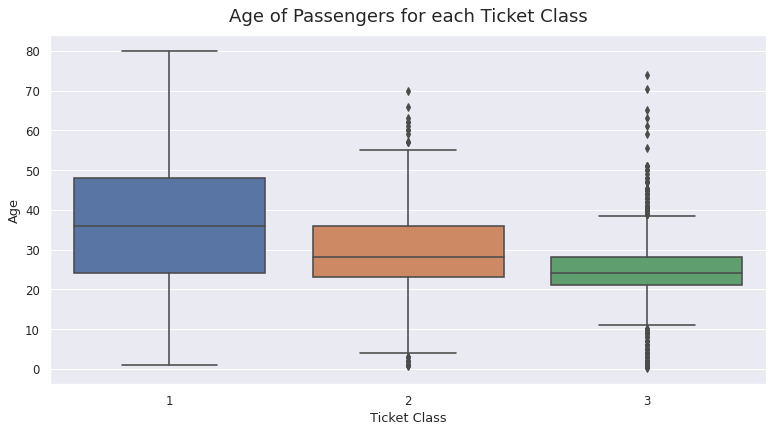

In [51]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below:

Here in the Boxplot graph it is shown the average age of passengers in each ticket class. In the y-axis is placed Age and the x-axis with number of ticket class. the outliers are placed with the values over age passengers in the different class of tickets in the titanic.

##### 2.3.2.11 Comparing multiple columns

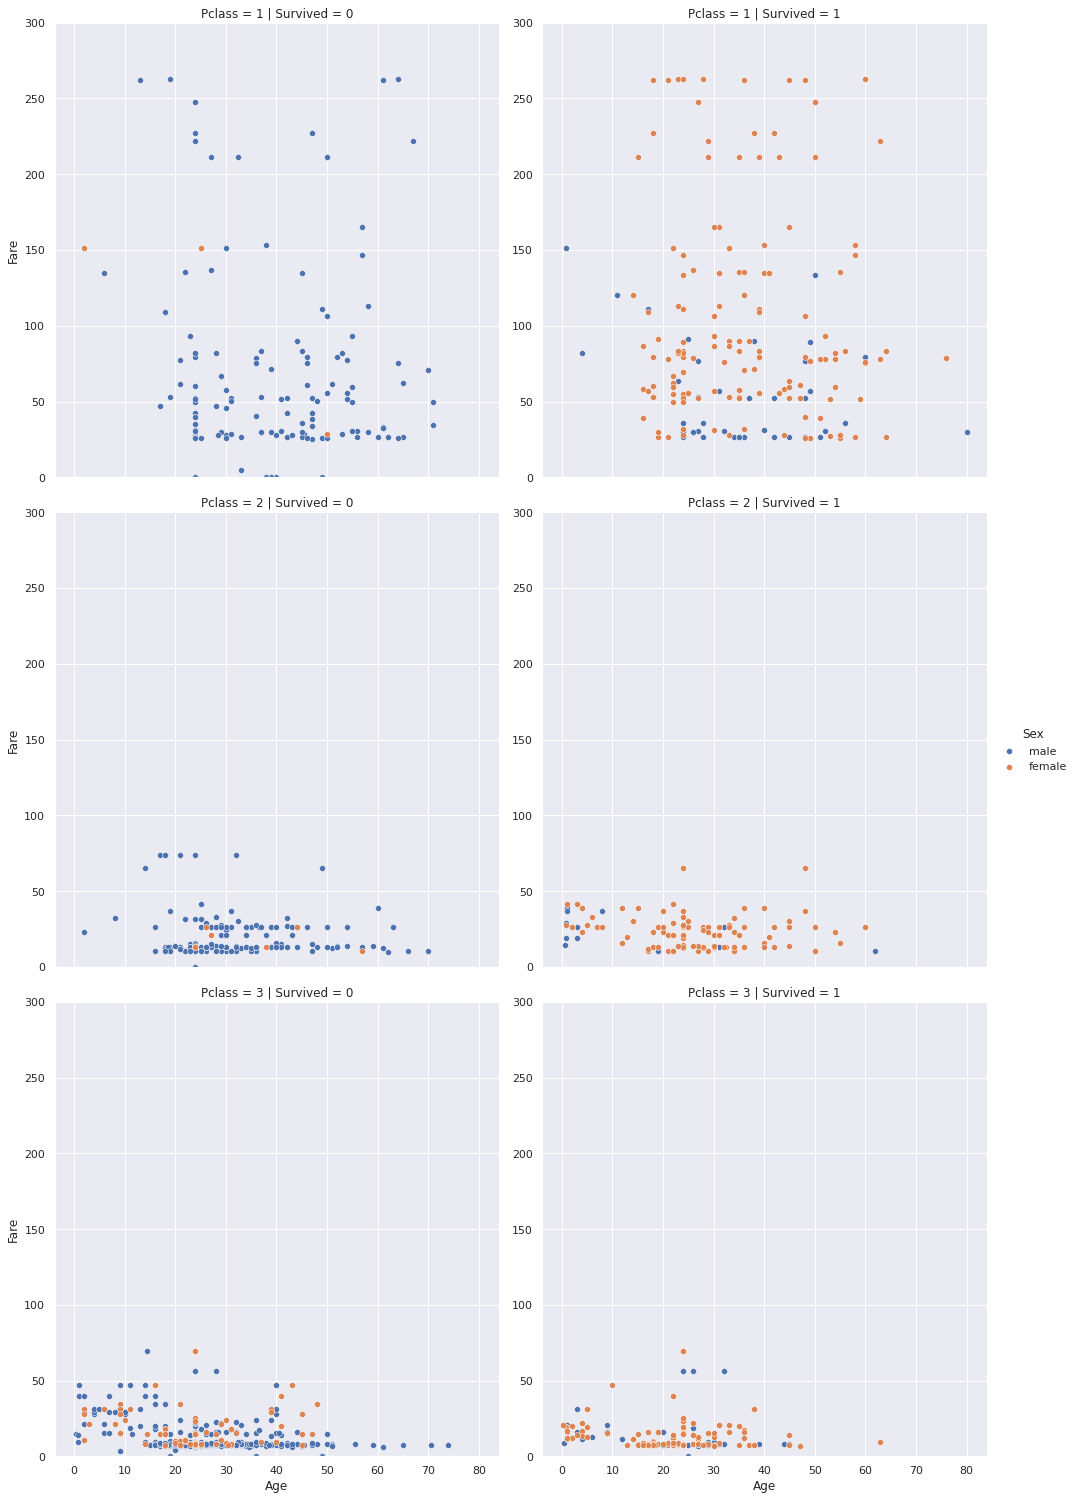

In [52]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

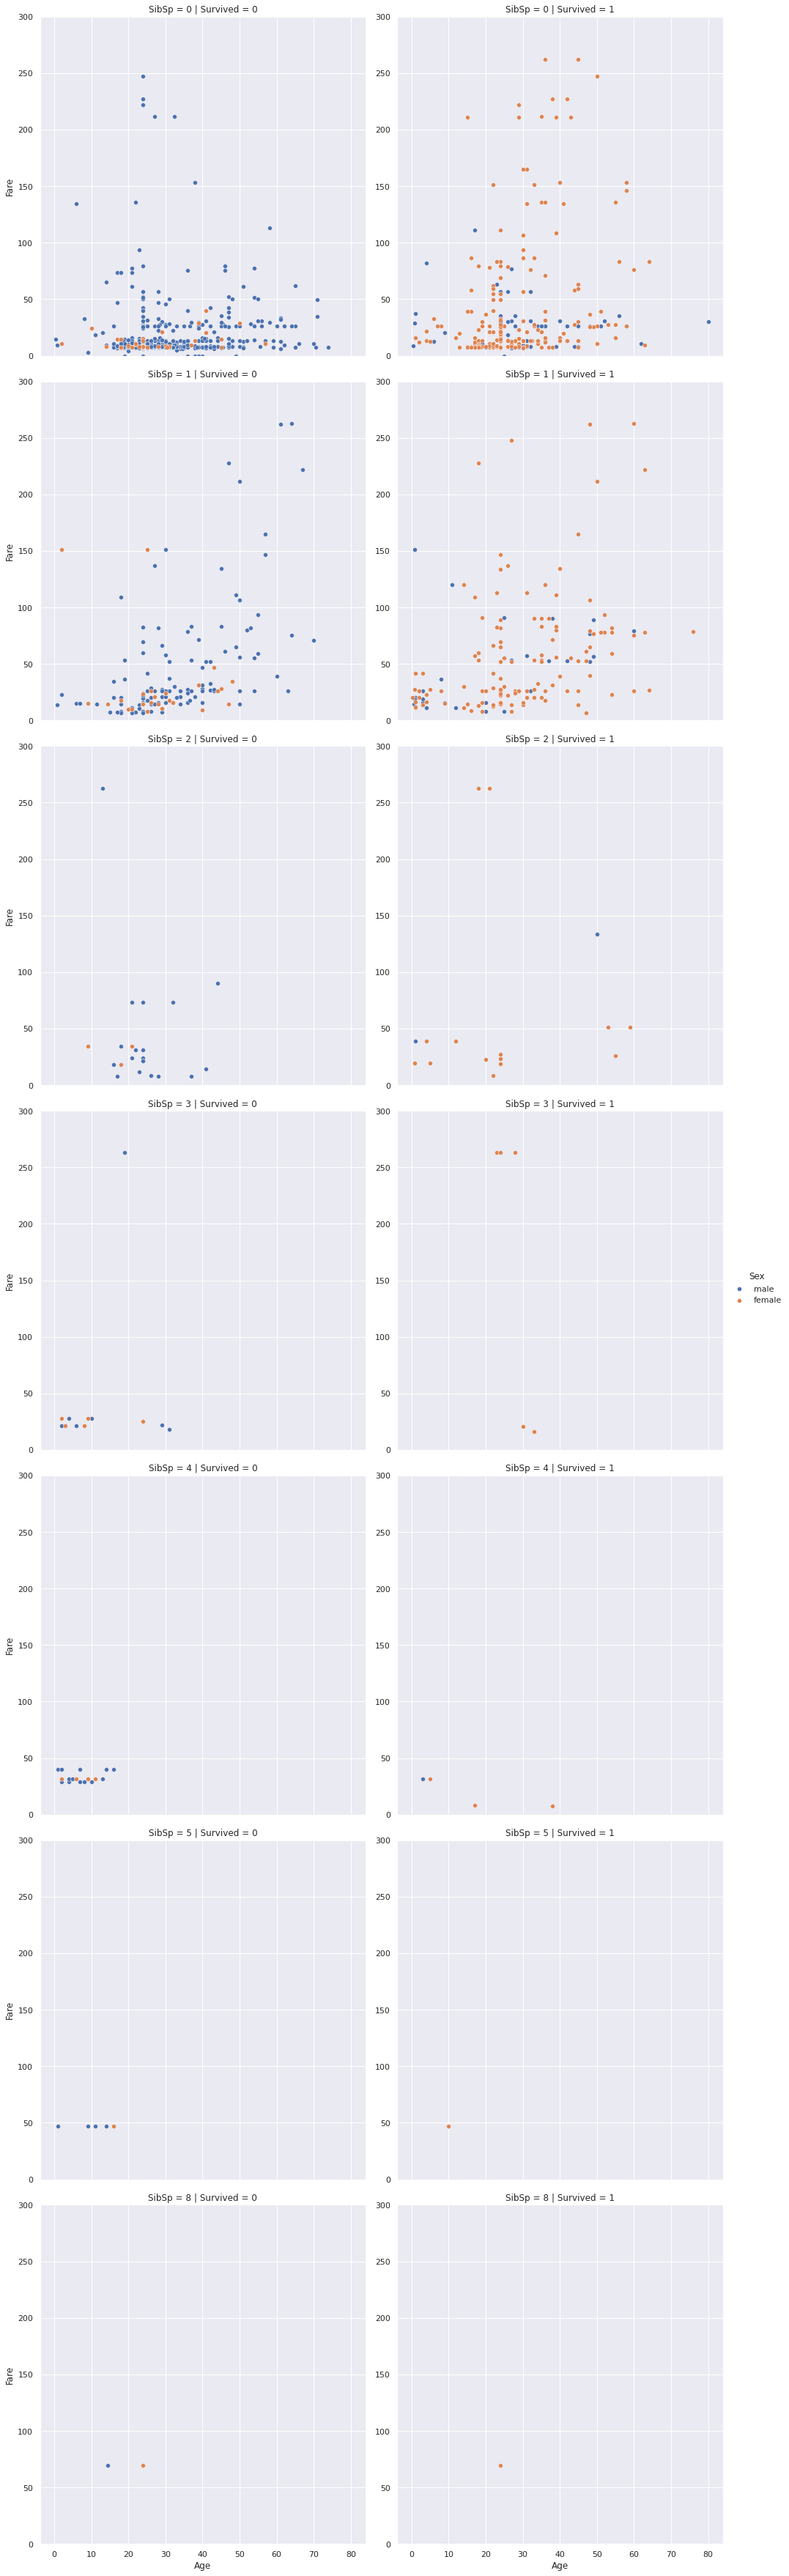

In [53]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

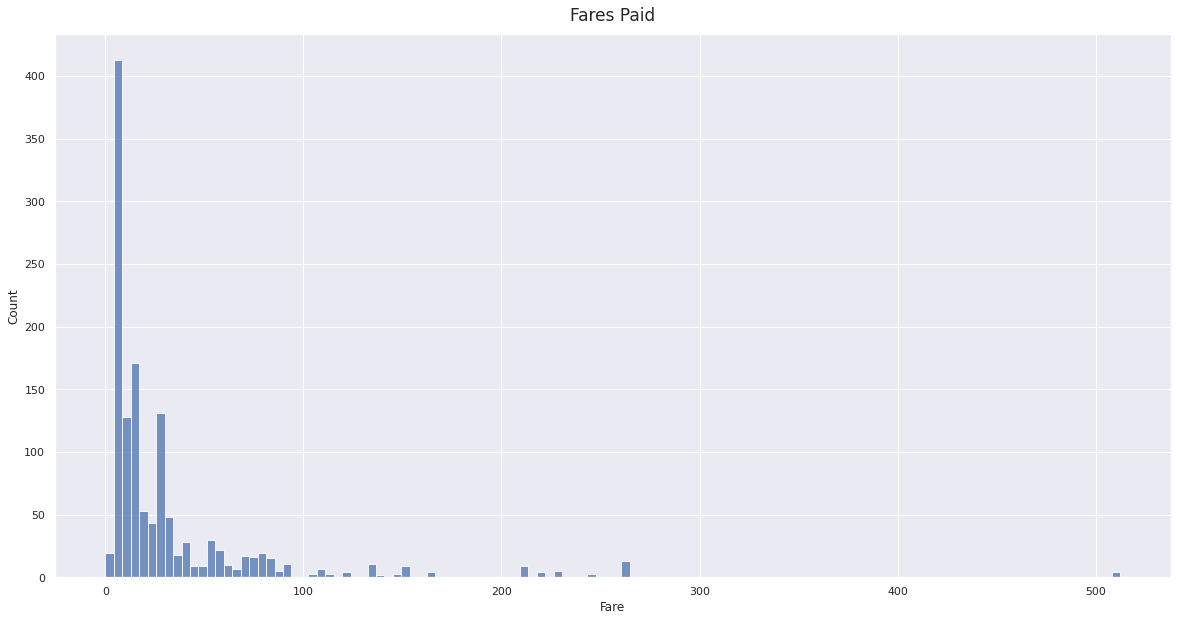

In [54]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

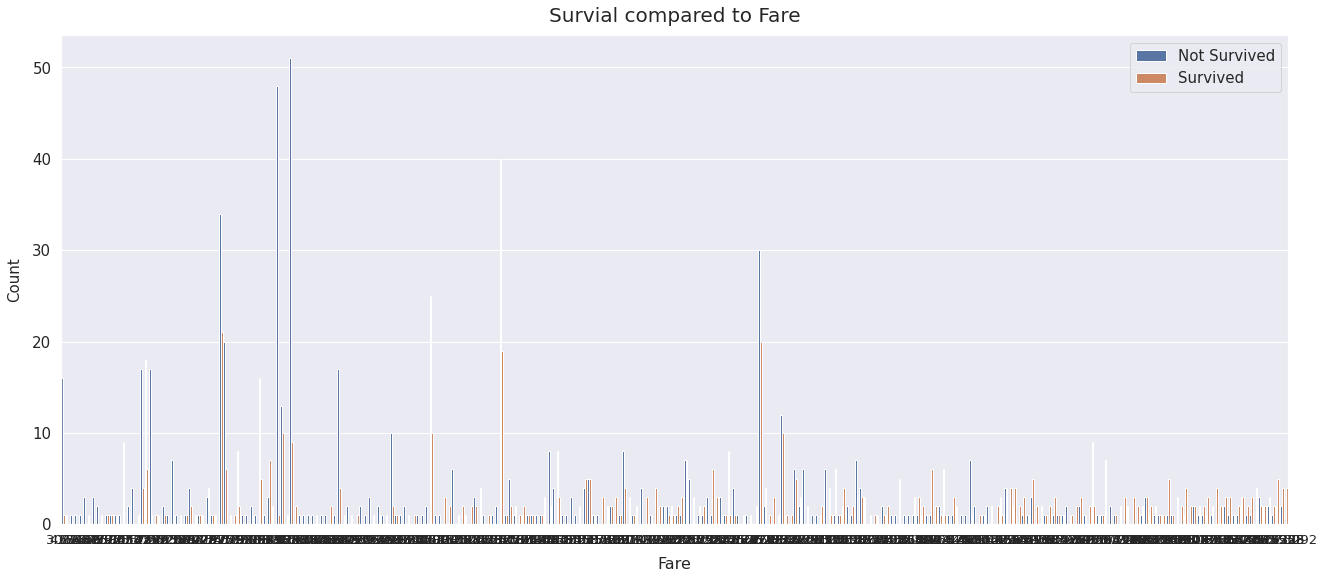

In [55]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below:

We can see that there are plotted scatter plot using seaborn by which we can see the comparison of Pclass, Age, Sex and Survivors. Also the plot showed us the survived and not survived with the respect to pclass for both male and female.We saw the more varience in pclass=1 and survived=1 than others.
Then we plotted scatter plot using seaborn by which we can see the Comparison of Parch, Age, Sex and Survivors.
Next, the plot showed us the survived and not survived with respect to pclass. We saw the more varience in sibsp=1 and survived=1 than others.
Then we plotted histoplot on the passengers fare paid.
Atlast, we plotted histoplot on survived or not survived with respect to fare paid.

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [56]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
train1 = train_data.copy()


train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
data1 = train1.copy()

data1 = pd.get_dummies(data1)

data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Now use the given dataset and perform the data preprocessing steps:**

In [218]:
df.Cabin.fillna('NULL', inplace = True)
df.dropna(subset=['Embarked'], inplace = True)
df.Age.fillna(df.Age.mode()[0], inplace = True)
df.dropna(subset=['Fare'], inplace = True)

In [219]:
#Converting sex column into numerical data
df['Sex'] = df['Sex'].map( {'male': 1, 'female': 0} ).astype(int)

In [220]:
x = df.drop(['PassengerId','Name', 'Ticket', 'Cabin','Survived','Embarked'], axis=1)
y = df['Survived']

print(x)
print(y)

     Pclass  Sex   Age  SibSp  Parch      Fare  Sex_Number
0         3    1  22.0      1      0    7.2500           0
1         1    0  38.0      1      0   71.2833           1
2         3    0  26.0      0      0    7.9250           1
3         1    0  35.0      1      0   53.1000           1
4         3    1  35.0      0      0    8.0500           0
..      ...  ...   ...    ...    ...       ...         ...
413       3    1  24.0      0      0    8.0500           0
414       1    0  39.0      0      0  108.9000           1
415       3    1  38.5      0      0    7.2500           0
416       3    1  24.0      0      0    8.0500           0
417       3    1  24.0      1      1   22.3583           0

[1306 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 1306, dtype: int64


### **Write Here**

 What do you undersend/find from the analysis above (section 3)? Write in your own words in this cell.



In the first step, we had to import the dataset that we have gathered. Importing the dataset is one of the important steps in data preprocessing in ML. However, before the import of dataset, we must set the current directory as the working directory. Then we copy the dataset into another new datasets as train1. Now we drop the columns as train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True). In dataset.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables. From the new column remaining existing will be saved in the dataset. We have try to find out about the missing values in the datasets. Also the categorical column values are change into numerical values in the rows.

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


In [242]:
import warnings

warnings.filterwarnings("ignore")

# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

# Fitting the dataset into Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regressor1 = LogisticRegression()
regressor1.fit(x_train, y_train)

# Train Data Accuracy Prediction

y_pred_train1 = regressor1.predict(x_train)
trainAccuracy1 = (accuracy_score(y_train, y_pred_train1)*100).round(5)
print('Accuracy of the train data: ', trainAccuracy1,'%')

# Test Data Accuracy Prediction

y_pred_test1 = regressor1.predict(x_test)
testAccuracy1 = (accuracy_score(y_test, y_pred_test1)*100).round(5)
print('Accuracy of the test data: ', testAccuracy1,'%')

Accuracy of the train data:  85.28736 %
Accuracy of the test data:  86.92661 %


**Now using different parameter**

In [244]:
import warnings

warnings.filterwarnings("ignore")

# Splitting into Train and Test Dataset(with different parameter)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 30)

# Fitting the dataset into Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

regressor2 = LogisticRegression(C=3)
regressor2.fit(x_train, y_train)

# Train Data Accuracy Prediction

y_pred_train = regressor2.predict(x_train)
trainAccuracy2 = (accuracy_score(y_train, y_pred_train)*100).round(5)
print('Accuracy of the train data: ', trainAccuracy2,'%')

# Test Data Accuracy Prediction

y_pred_test = regressor2.predict(x_test)
testAccuracy2 = (accuracy_score(y_test, y_pred_test)*100).round(5)
print('Accuracy of the test data: ', testAccuracy2,'%')

Accuracy of the train data:  83.44828 %
Accuracy of the test data:  89.90826 %


**Write Here**

What do you undersend this above (section 4.1)? Write in your own words in this cell.

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [223]:
# Code Here (Add as many cells as you need)
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising.csv')
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [224]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
df2.info()
df2.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [225]:
# Count rows and coulums
# Code Here
rows = len(df2. axes[0])
columns = len(df2. axes[1])
print('Rows: ',rows)
print('Columns: ',columns)

Rows:  200
Columns:  4


# **Identifying duplicate values**

In [226]:
# Code Here 
duplicateValues= df2[df2.duplicated()]
print(duplicateValues)

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


# **Identifying missing values**

In [227]:
# Find the amount of missing values in each column
# Code Here 

MV = df2.isna().sum() 
print(MV)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [228]:
# Correlation table
correlation1 = df2.corr()
correlation1

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


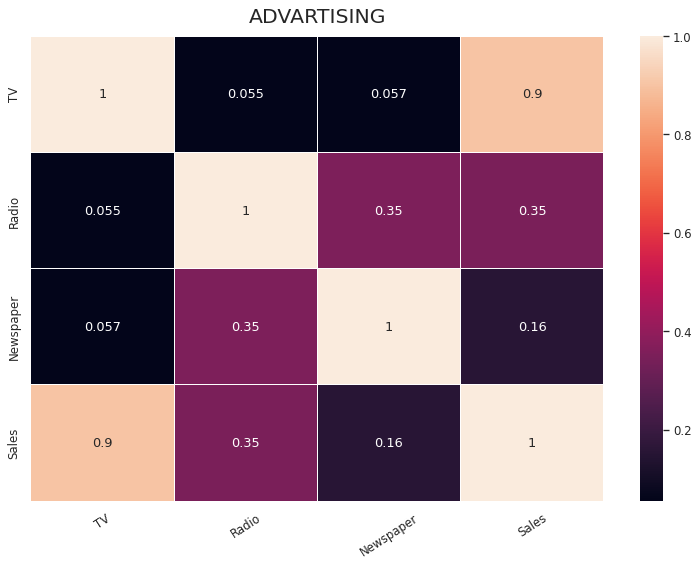

In [229]:
# Visualisation of the corralation table

plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation1, linecolor='white',linewidths=0.1, annot=True)
plt.title('Advartising'.upper(), size=19, pad=13)
plt.xticks(rotation=33)
plt.show()

In [230]:
x2 = df2.drop(['Sales'], axis=1)
y2 = df2['Sales']

print(x2)
print(y2)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [241]:
# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 1/3, random_state = 20)

# Fitting the dataset into Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(x2_train, y2_train)


# Predicting the values of the Train Set

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y2_pred_train1 = regressor2.predict(x2_train)
y2_pred_test1 = regressor2.predict(x2_test)

# Calculate MAE
mae1_train = mean_absolute_error(y2_train, y2_pred_train1)
print('Mean Absolute Error of the train data: ', round(mae1_train,2))

mae1_test = mean_absolute_error(y2_test, y2_pred_test1)
print('Mean Absolute Error of the test data: ', round(mae1_test,2))

# Calculate MSE
mse1_train = mean_squared_error(y2_train, y2_pred_train1)
print('Mean Squared Error of the train data: ', round(mse1_train,2))

mse1_test = mean_squared_error(y2_test, y2_pred_test1)
print('Mean Squared Error of the test data: ', round(mse1_test,2))

# Calculate r2_score
rs1_train = r2_score(y2_train, y2_pred_train1)
print('Mean r2_score Error of the train data: ', round(rs1_train,2)) 

rs1_test = r2_score(y2_test, y2_pred_test1)
print('Mean r2_score Error of the test data: ', round(rs1_test, 2))

Mean Absolute Error of the train data:  1.1
Mean Absolute Error of the test data:  1.51
Mean Squared Error of the train data:  2.06
Mean Squared Error of the test data:  4.13
Mean r2_score Error of the train data:  0.92
Mean r2_score Error of the test data:  0.87


# Using Different Parameter for Tune_up

In [240]:
# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 1/3, random_state = 30)

# Fitting the dataset into Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(x2_train, y2_train)


# Predicting the values of the Train Set

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y2_pred_train1 = regressor2.predict(x2_train)
y2_pred_test1 = regressor2.predict(x2_test)

# Calculate MAE
mae1_train = mean_absolute_error(y2_train, y2_pred_train1)
print('Mean Absolute Error of the train data: ', round(mae1_train,2))

mae1_test = mean_absolute_error(y2_test, y2_pred_test1)
print('Mean Absolute Error of the test data: ', round(mae1_test,2))

# Calculate MSE
mse1_train = mean_squared_error(y2_train, y2_pred_train1)
print('Mean Squared Error of the train data: ', round(mse1_train,2))

mse1_test = mean_squared_error(y2_test, y2_pred_test1)
print('Mean Squared Error of the test data: ', round(mse1_test,2))

# Calculate r2_score
rs1_train = r2_score(y2_train, y2_pred_train1)
print('r2_score Error of the train data: ', round(rs1_train,2)) 

rs1_test = r2_score(y2_test, y2_pred_test1)
print('r2_score Error of the test data: ', round(rs1_test, 2))

Mean Absolute Error of the train data:  1.27
Mean Absolute Error of the test data:  1.22
Mean Squared Error of the train data:  2.83
Mean Squared Error of the test data:  2.62
r2_score Error of the train data:  0.89
r2_score Error of the test data:  0.91


## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

### **Write Here**

From 4.1, we can see that we changed the random state for tuning and it improved the result. From 86.92661% test data improved to 89.90826%

From 4.2, we can see that, by changing random state we can get better result in r2_score than mean absolute error and mean square error.

# Part B (Analysis of the Assignment dataset you have collected (Choose One dataset))



## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models. 

**Write Here**

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In [119]:
# Code Here (Add as many cells as you need)
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [120]:
ar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_record.csv')
cr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_record.csv')

In [121]:
display('Application Record:',ar.head(), 'Credit Record:',cr.head())

'Application Record:'

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


'Credit Record:'

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [122]:
# Merging ar and cr
left = cr
right = ar

df1 = pd.merge(left, right, on=["ID"])
df1

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777711,5150487,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777712,5150487,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777713,5150487,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [123]:
#Show all column names
# Code Here
column_names = list(df1.columns.values)
print("Columns Names:",column_names)

Columns Names: ['ID', 'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']


In [124]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
print(df1.info())
print(df1.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [125]:
# Count rows and coulums
# Code Here
print("Rows:",len(df1))
print("Columns:",len(df1.columns))

Rows: 777715
Columns: 20


In [126]:
# Total cells in the dataset
# Code Here
print("Total cells in the dataset:",df1.size)

Total cells in the dataset: 15554300


### 2.2 Data Cleaning









#### Identifying duplicate values


In [127]:
# Code Here (Add as many cells as you need)
# Code Here 
duplicate = df1[df1.duplicated()]
 
print("Duplicate Rows:", duplicate)

Duplicate Rows: Empty DataFrame
Columns: [ID, MONTHS_BALANCE, STATUS, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS]
Index: []


#### Identifying missing values


In [128]:
# Code Here (Add as many cells as you need)
# Detect missing values
print(df1.isnull())

           ID  MONTHS_BALANCE  STATUS  CODE_GENDER  FLAG_OWN_CAR  \
0       False           False   False        False         False   
1       False           False   False        False         False   
2       False           False   False        False         False   
3       False           False   False        False         False   
4       False           False   False        False         False   
...       ...             ...     ...          ...           ...   
777710  False           False   False        False         False   
777711  False           False   False        False         False   
777712  False           False   False        False         False   
777713  False           False   False        False         False   
777714  False           False   False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
0                 False         False             False             False   
1                 False      

#### Visualisation of missing data


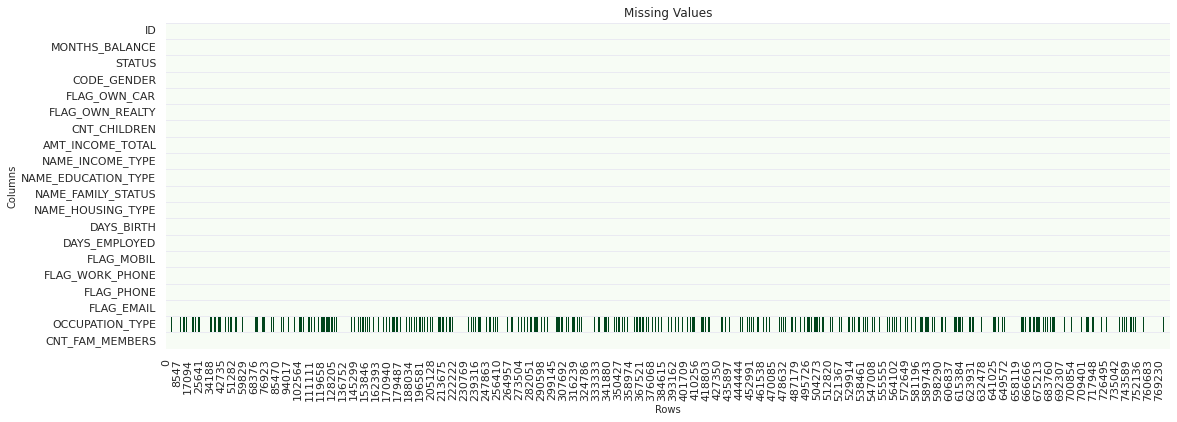

In [129]:
# Code Here (Add as many cells as you need)
# Visualisation
plt.figure(figsize=(18,6))
sns.heatmap(df1.isnull().transpose(),
            cbar=False, cmap="Greens")
plt.title("Missing Values", fontsize=12)
plt.xlabel("Rows", fontsize = 10) 
plt.ylabel("Columns", fontsize = 10)
plt.show()

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




In [130]:
# Code Here (Add as many cells as you need)
df1.OCCUPATION_TYPE.fillna('NULL', inplace = True)

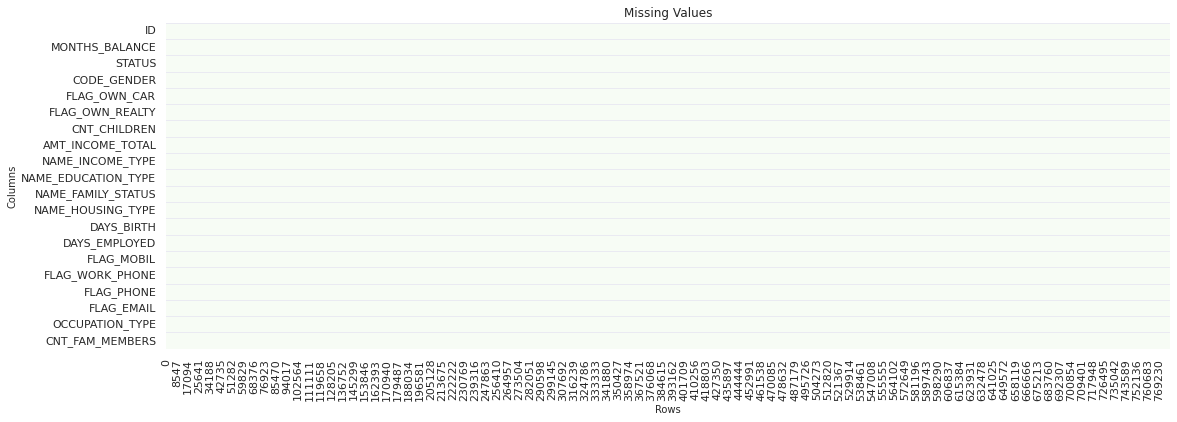

In [131]:
plt.figure(figsize=(18,6))
sns.heatmap(df1.isnull().transpose(),
            cbar=False, cmap="Greens")
plt.title("Missing Values", fontsize=12)
plt.xlabel("Rows", fontsize = 10) 
plt.ylabel("Columns", fontsize = 10)
plt.show()

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

In [132]:
# Code Here (Add as many cells as you need)
#Converting sex column into numerical data
df1['CODE_GENDER'] = df1['CODE_GENDER'].map( {'M': 1, 'F': 0} ).astype(int)

In [133]:
#Converting FLAG_OWN_CAR column into numerical data
df1['FLAG_OWN_CAR'] = df1['FLAG_OWN_CAR'].map( {'Y': 1, 'N': 0} ).astype(int)

In [134]:
#Converting FLAG_OWN_REALTY column into numerical data
df1['FLAG_OWN_REALTY'] = df1['FLAG_OWN_REALTY'].map( {'Y': 1, 'N': 0} ).astype(int)

In [135]:
correlation1 = df1.corr()
correlation1

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,1.000000,0.005007,0.010124,-0.010233,-0.096581,0.026269,-0.027597,0.042020,-0.025322,NaN,0.084800,0.006346,-0.056083,0.027375
MONTHS_BALANCE,0.005007,1.000000,0.013635,-0.003142,-0.008977,0.000913,0.001831,0.035756,-0.004222,NaN,0.001529,-0.005120,0.005288,-0.006276
CODE_GENDER,0.010124,0.013635,1.000000,0.368554,-0.055791,0.103816,0.203889,0.203718,-0.172962,NaN,0.059027,-0.029471,-0.011710,0.138505
FLAG_OWN_CAR,-0.010233,-0.003142,0.368554,1.000000,-0.017764,0.109014,0.219579,0.162202,-0.157830,NaN,0.019654,-0.014249,0.029040,0.156436
FLAG_OWN_REALTY,-0.096581,-0.008977,-0.055791,-0.017764,1.000000,-0.010621,0.039443,-0.130354,0.092166,NaN,-0.210804,-0.061221,0.054065,-0.014404
CNT_CHILDREN,0.026269,0.000913,0.103816,0.109014,-0.010621,1.000000,0.039304,0.356177,-0.228945,NaN,0.042226,-0.018882,0.015726,0.892079
AMT_INCOME_TOTAL,-0.027597,0.001831,0.203889,0.219579,0.039443,0.039304,1.000000,0.081231,-0.180674,NaN,-0.021229,0.018687,0.085776,0.031379
DAYS_BIRTH,0.042020,0.035756,0.203718,0.162202,-0.130354,0.356177,0.081231,1.000000,-0.608856,NaN,0.180658,-0.026717,0.100945,0.327750
DAYS_EMPLOYED,-0.025322,-0.004222,-0.172962,-0.157830,0.092166,-0.228945,-0.180674,-0.608856,1.000000,NaN,-0.243677,-0.013817,-0.082474,-0.227645
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


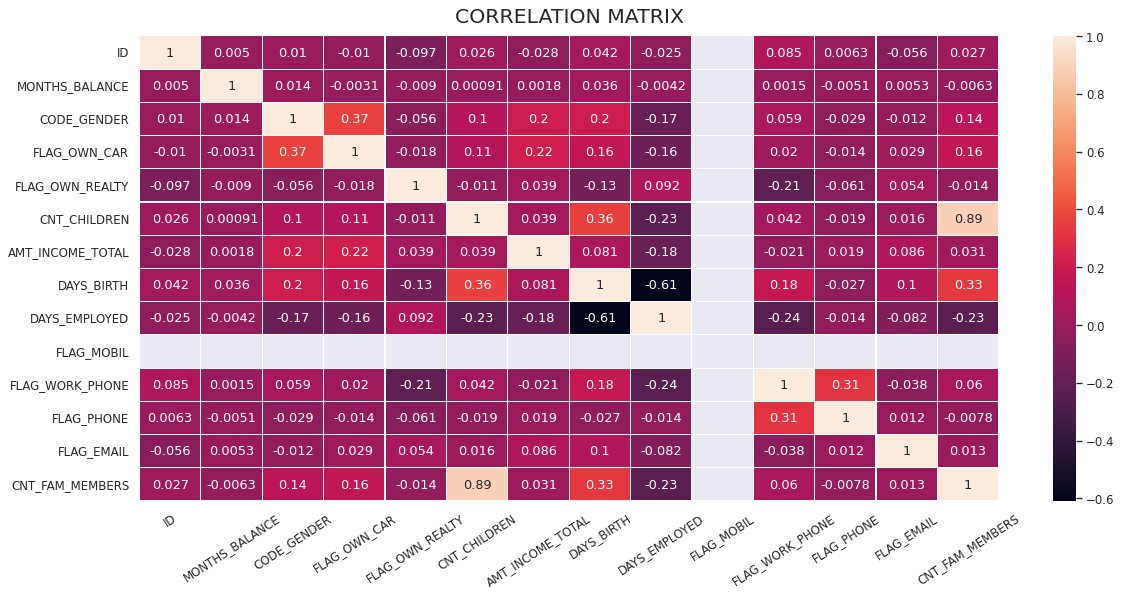

In [136]:
# Visualisation of the corralation table

plt.figure(figsize=(18,8), dpi=77)
sns.heatmap(correlation1, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xticks(rotation=33)
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [137]:
# Code Here (Add as many cells as you need)

**We have no continuous value in our dataset.**

#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



Sex Proportion

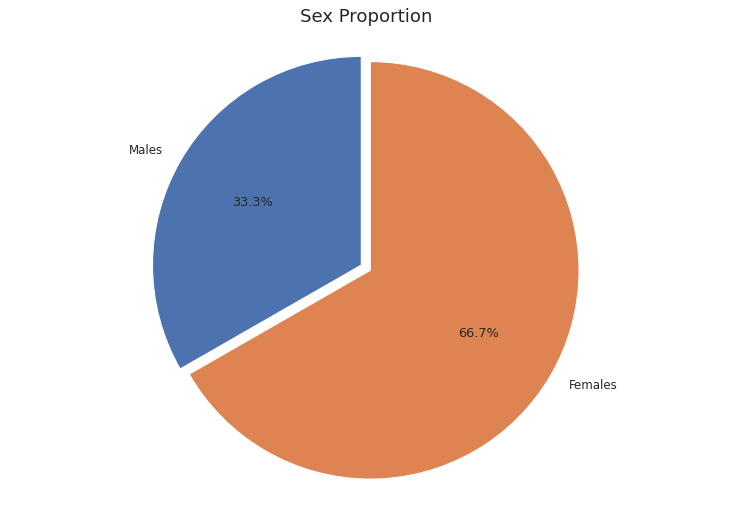

In [138]:
m = (df1['CODE_GENDER'] == 1).sum()
f = (df1['CODE_GENDER'] == 0).sum()
proportions1 = [m, f]
#print(m,f)

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions1, data=df1, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

Car Owning Proportion

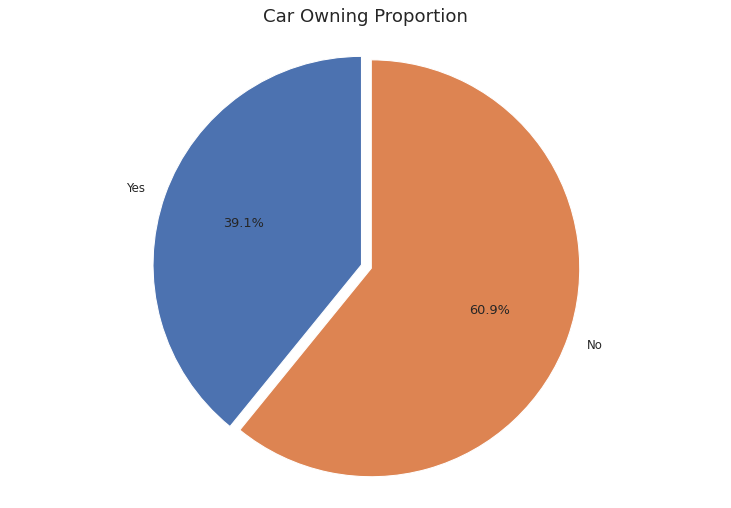

In [139]:
y = (df1['FLAG_OWN_CAR'] == 1).sum()
n = (df1['FLAG_OWN_CAR'] == 0).sum()
proportions1 = [y, n]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions1, data=df1, labels= ['Yes', 'No'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Car Owning Proportion", size=17, pad=13)
plt.show()

Property Owning Propertion

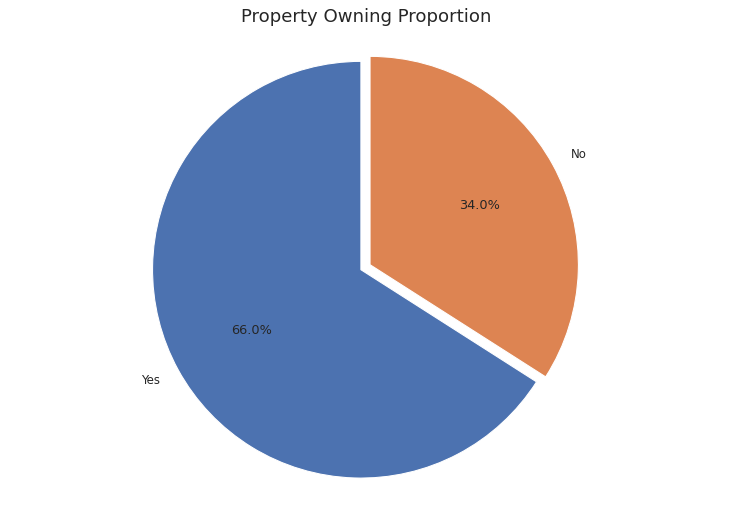

In [140]:
y1 = (df1['FLAG_OWN_REALTY'] == 1).sum()
n1 = (df1['FLAG_OWN_REALTY'] == 0).sum()
proportions1 = [y1, n1]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions1, data=df1, labels= ['Yes', 'No'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Property Owning Proportion", size=17, pad=13)
plt.show()

Parcntage of Applications submitted based on Education

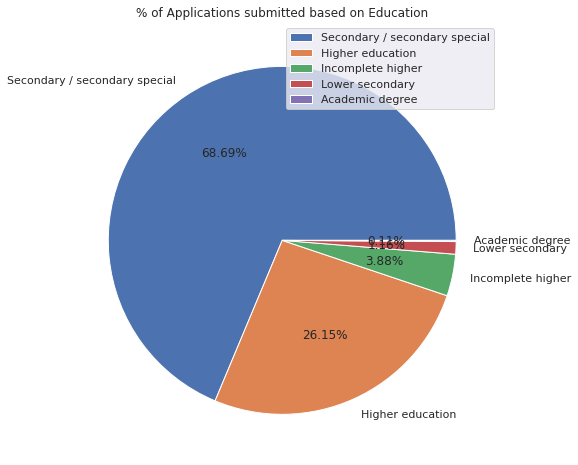

In [153]:
plt.figure(figsize=(8,8))
plt.pie(df1['NAME_EDUCATION_TYPE'].value_counts(), labels=df1['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('Parcntage of Applications submitted based on Education')
plt.legend()
plt.show()

In [166]:
# Removing the Outlier

print(np.where(df1['AMT_INCOME_TOTAL']>2000000))


# Calculate the quartiles
def outliers (df1, ft):
  q1 = df1[ft].quantile(0.25)
  q3 = df1[ft].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  ls = df1.index [(df1[ft] < lower_bound) | (df1[ft] > upper_bound)]
  return ls



index_list = []
for feature in['AMT_INCOME_TOTAL']:
  index_list.extend(outliers(df1, feature))

def remove(df1, ls):
  ls = sorted(set(ls))
  df1 = df1.drop(ls)
  return df1


df1 = remove(df1, index_list)


(array([], dtype=int64),)


Income of People who are male/female

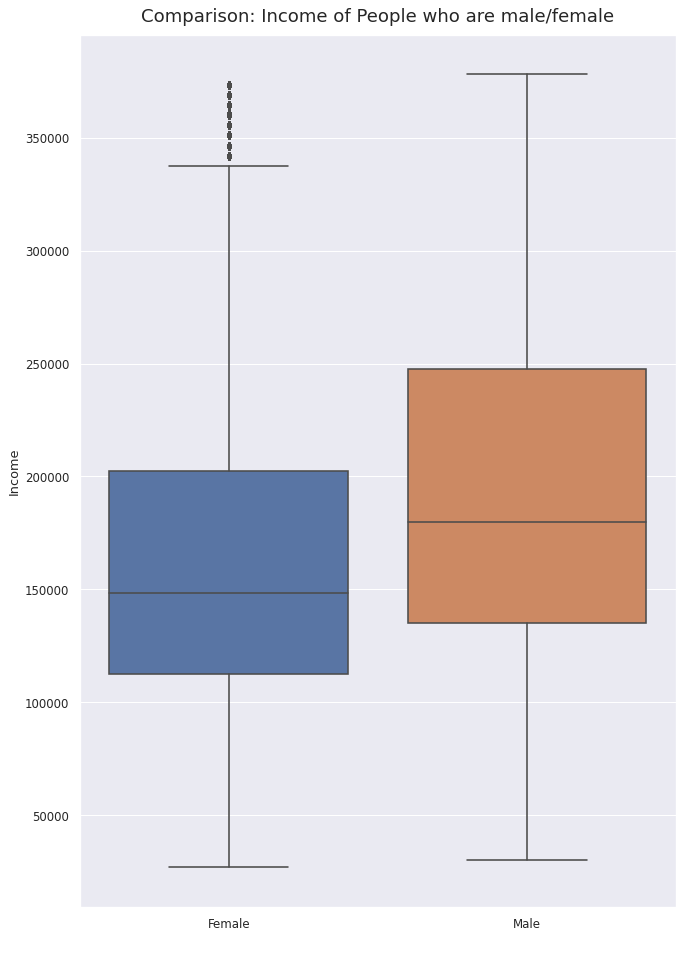

In [167]:
plt.figure(figsize=(10,15), dpi=77)
sns.boxplot(x="CODE_GENDER", y="AMT_INCOME_TOTAL", data=df1)
plt.title("Comparison: Income of People who are male/female", size=17, pad=13)
plt.ylabel('Income')
plt.xlabel(' ')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

The bar plot of Male and Female who own a car


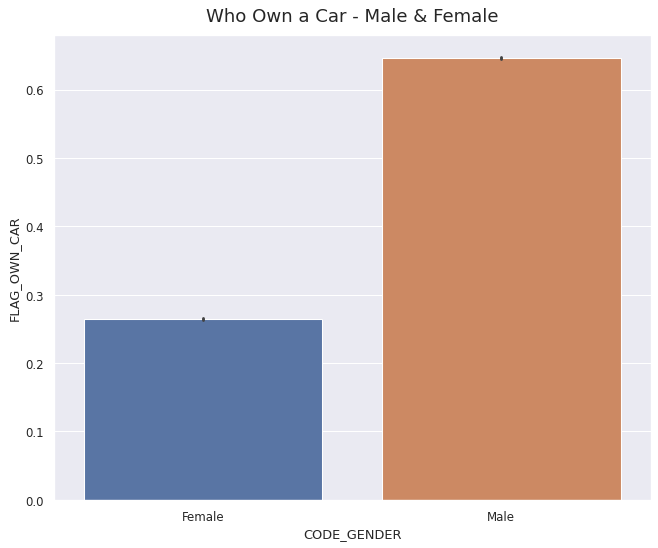

In [142]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="CODE_GENDER", y="FLAG_OWN_CAR", data=df1)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Who Own a Car - Male & Female", size=17, pad=13 )
plt.show()

 Comparison: Owns a Propety - Male & Female

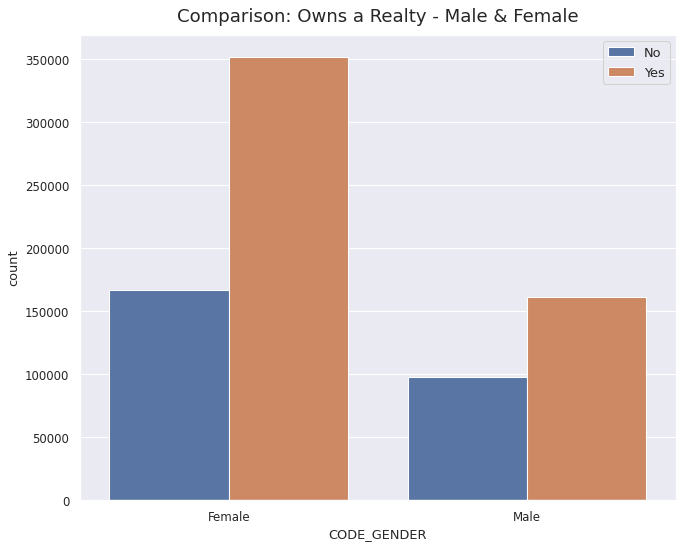

In [143]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df1['CODE_GENDER'], hue=df1['FLAG_OWN_REALTY'])
plt.title("Comparison: Owns a Realty - Male & Female", size=17, pad= 13)
plt.legend(['No', 'Yes'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Comparison: Gender by Income Type

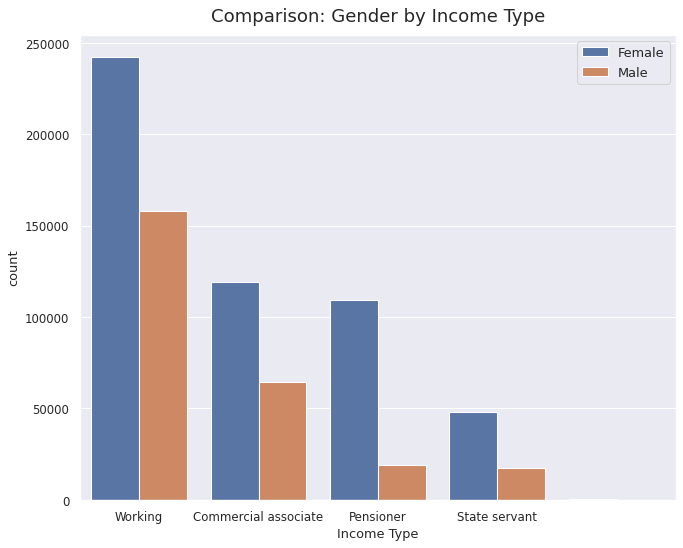

In [144]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df1['NAME_INCOME_TYPE'],hue=df1['CODE_GENDER'])
plt.title("Comparison: Gender by Income Type", size=17, pad=13)
plt.xlabel('Income Type')
plt.legend(['Female', 'Male'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2, 3],['Working', 'Commercial associate', 'Pensioner','State servant'])
plt.show()

Income Barplot

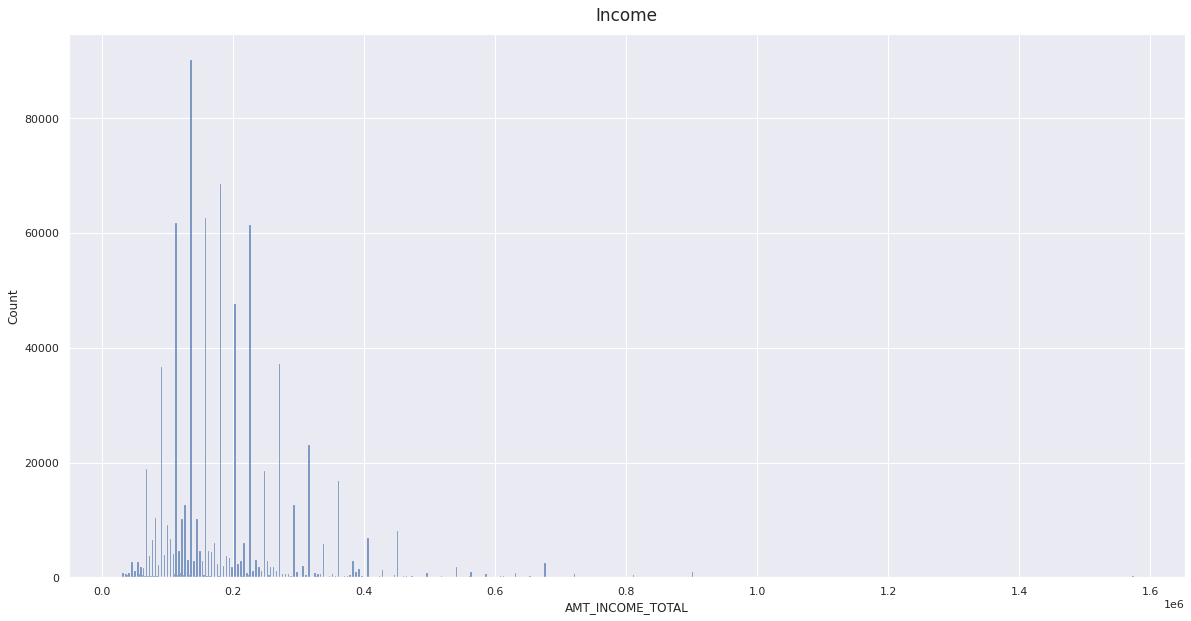

In [145]:
plt.figure(figsize=(20,10))
sns.histplot(df1.AMT_INCOME_TOTAL)
plt.title('Income', size=17, pad=13)
plt.show()

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

In [162]:
# Converting 'DAYS_BIRTH' values from Day to Years
df1['DAYS_BIRTH'] = round(df1['DAYS_BIRTH']/-365,0)
df1.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [163]:
#if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
df1['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [165]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
df1['DAYS_EMPLOYED'] = abs(round(df1['DAYS_EMPLOYED']/-365,0))
df1.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)  

In [169]:
# categorizing 'STATUS' column to binary classification  0 : Good Client and 1 : bad client
df1['STATUS'].replace(['C', 'X'],0, inplace=True)
df1['STATUS'].replace(['2','3','4','5'],1, inplace=True)
df1['STATUS'] = df1['STATUS'].astype('int')

In [173]:
df1_trans = df1.groupby('ID').agg(max).reset_index()
df1_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

In [184]:
x3 = df1.drop(['STATUS', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
               'OCCUPATION_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL',
               'ID'], axis=1)
y3 = df1['STATUS']

print(x3)
print(y3)

        MONTHS_BALANCE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
31                   0            1             1                1   
32                  -1            1             1                1   
33                  -2            1             1                1   
34                  -3            1             1                1   
35                  -4            1             1                1   
...                ...          ...           ...              ...   
777710             -25            1             1                0   
777711             -26            1             1                0   
777712             -27            1             1                0   
777713             -28            1             1                0   
777714             -29            1             1                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AGE_YEARS  YEARS_EMPLOYED  \
31                 0          112500.0       59.0             3.0   
32                 0 

In [197]:
import warnings

warnings.filterwarnings("ignore")

# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 1/3, random_state=0)

# Fitting the dataset into Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regressor3 = LogisticRegression()
regressor3.fit(x3_train, y3_train)

# Train Data Accuracy Prediction

y3_pred_train1 = regressor3.predict(x3_train)
trainAccuracy3 = (accuracy_score(y3_train, y3_pred_train1)*100).round(5)
print('Accuracy of the train data: ', trainAccuracy3,'%')

# Test Data Accuracy Prediction

y3_pred_test1 = regressor3.predict(x3_test)
testAccuracy3 = (accuracy_score(y3_test, y3_pred_test1)*100).round(5)
print('Accuracy of the test data: ', testAccuracy3,'%')

Accuracy of the train data:  98.53535 %
Accuracy of the test data:  98.49704 %


Using different Parameters

In [198]:
import warnings

warnings.filterwarnings("ignore")

# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 1/3, random_state=30)

# Fitting the dataset into Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regressor3 = LogisticRegression()
regressor3.fit(x3_train, y3_train)

# Train Data Accuracy Prediction

y3_pred_train1 = regressor3.predict(x3_train)
trainAccuracy3 = (accuracy_score(y3_train, y3_pred_train1)*100).round(5)
print('Accuracy of the train data: ', trainAccuracy3,'%')

# Test Data Accuracy Prediction

y3_pred_test1 = regressor3.predict(x3_test)
testAccuracy3 = (accuracy_score(y3_test, y3_pred_test1)*100).round(5)
print('Accuracy of the test data: ', testAccuracy3,'%')

Accuracy of the train data:  98.51901 %
Accuracy of the test data:  98.52971 %


### **Write Here**

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

### **Write Here**

We can see that by changing parameters we can get better predicton at credit card aproval. We changed the value of random state.